### Importamos librerías

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, make_scorer, precision_recall_curve, PrecisionRecallDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
from sklearn import tree
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.pipeline import Pipeline
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.externals.joblib import dump, load
import optuna
import os
from collections import Counter
import plotly.graph_objects as go

In [2]:
df = pd.read_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data','cerebrovascular.csv'))
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


### Análisis

In [3]:
Counter(df['stroke'])

Counter({0: 42617, 1: 783})

In [4]:
df.drop('id', axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [6]:
df.drop(['hypertension', 'heart_disease', 'stroke'], axis=1).describe()

,age,avg_glucose_level,bmi
count,43400.000000,43400.000000,41938.000000
mean,42.217894,104.482750,28.605038
std,22.519649,43.111751,7.770020
min,0.080000,55.000000,10.100000
25%,24.000000,77.540000,23.200000
50%,44.000000,91.580000,27.700000
75%,60.000000,112.070000,32.900000
max,82.000000,291.050000,97.600000


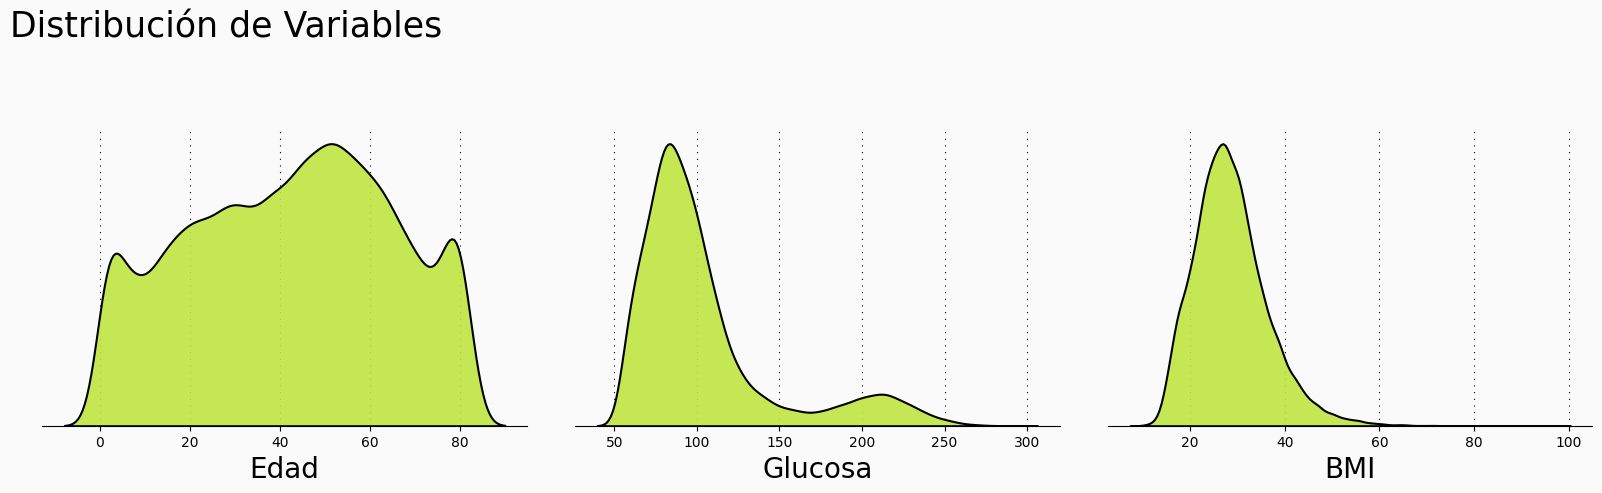

In [7]:
fig = plt.figure(figsize=(20, 20), facecolor='#fafafa')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(plot)], color='#bfe541', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='black', linestyle=':', dashes=(1,5))
        plot += 1
        
ax0.set_xlabel('Edad', fontsize=20)
ax1.set_xlabel('Glucosa', fontsize=20)
ax2.set_xlabel('BMI', fontsize=20)
ax0.text(-20, 0.022, 'Distribución de Variables', fontsize=25)

plt.show()
# fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', 'image', "var_ent.jpg"))

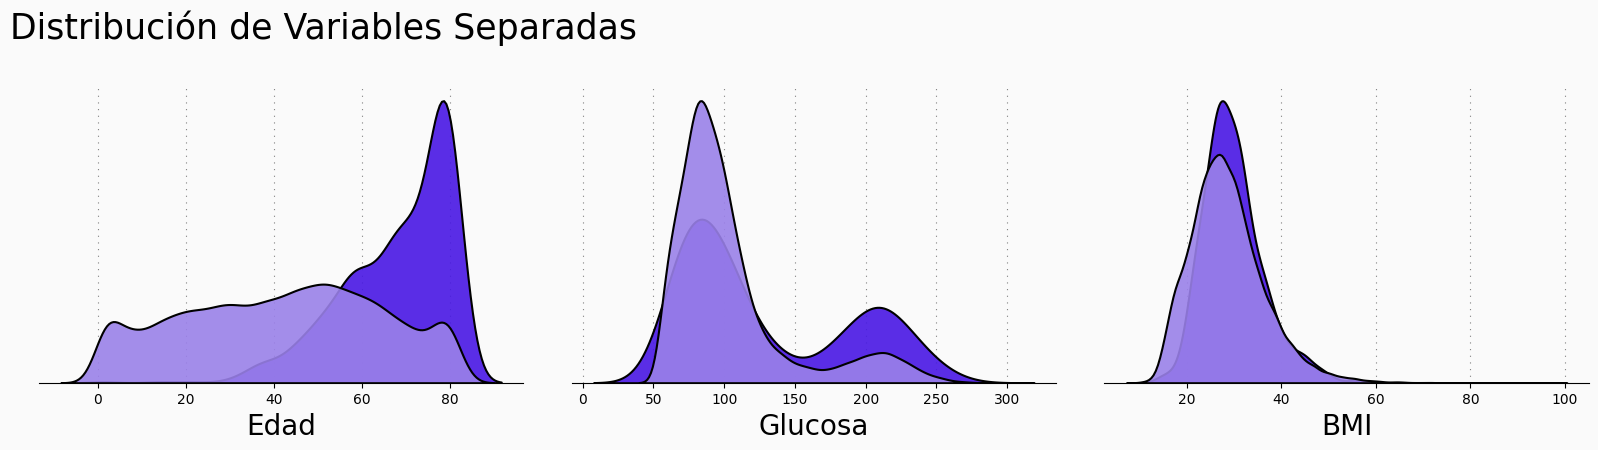

In [8]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]
conts = ['age','avg_glucose_level','bmi']
background_color = "#fafafa"

fig = plt.figure(figsize=(20, 20),facecolor=background_color)
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

plot = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(plot)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(plot)].set_facecolor(background_color)
        locals()["ax"+str(plot)].tick_params(axis='y', left=False)
        locals()["ax"+str(plot)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(plot)].spines[s].set_visible(False)
        plot += 1

plot = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(plot)], color='#4817e4', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(plot)], color='#9a81e9', shade=True, linewidth=1.5, ec='black',alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(plot)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        plot += 1

ax0.set_xlabel('Edad', fontsize=20)
ax1.set_xlabel('Glucosa', fontsize=20)
ax2.set_xlabel('BMI', fontsize=20)

ax0.text(-20, 0.056, 'Distribución de Variables Separadas', fontsize=25)

plt.show()
# fig.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "var_sep.jpg"))

In [9]:
columnas = ['age', 'avg_glucose_level', 'bmi']
nombres = ['Edad', 'Nivel de Glucosa', 'BMI']
colors = ['blue', 'green', 'red']
for num, i in enumerate(columnas):
    fig = go.Figure()
    fig.add_trace(go.Box(y=df[i], name=i))
    fig.update_layout(title_text='Boxplot de {}'.format(nombres[num]))
    fig.update_traces(marker=dict(color=colors[columnas.index(i)]))
    fig.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [11]:
gender = pd.value_counts(df['gender'])
gender

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

In [12]:
# Plotly pie chart with values and percentage
fig = go.Figure(data=[go.Pie(labels=gender.index, values=gender.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Gender Distribution')
fig.show()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             43400 non-null  object 
 1   age                43400 non-null  float64
 2   hypertension       43400 non-null  int64  
 3   heart_disease      43400 non-null  int64  
 4   ever_married       43400 non-null  object 
 5   work_type          43400 non-null  object 
 6   Residence_type     43400 non-null  object 
 7   avg_glucose_level  43400 non-null  float64
 8   bmi                41938 non-null  float64
 9   smoking_status     30108 non-null  object 
 10  stroke             43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [14]:
pd.crosstab(index=df['stroke'], columns=df['gender'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

gender,Female,Male,Other,All
stroke,,,,
0,58.142857,40.02765,0.025346,98.195853
1,0.993088,0.81106,0.000000,1.804147
All,59.135945,40.83871,0.025346,100.000000


In [15]:
hyper = pd.value_counts(df['hypertension'])
hyper

hypertension
0    39339
1     4061
Name: count, dtype: int64

In [16]:
fig = go.Figure(data=[go.Pie(labels=hyper.index, values=hyper.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Hypertension Distribution')
fig.show()

In [17]:
pd.crosstab(index=df['stroke'], columns=df['hypertension'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

hypertension,0,1,All
stroke,,,
0,89.299539,8.896313,98.195853
1,1.343318,0.460829,1.804147
All,90.642857,9.357143,100.000000


In [18]:
heart = pd.value_counts(df['heart_disease'])
heart

heart_disease
0    41338
1     2062
Name: count, dtype: int64

In [19]:
fig = go.Figure(data=[go.Pie(labels=heart.index, values=heart.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Heart Disease Distribution')
fig.show()

In [20]:
pd.crosstab(index=df['stroke'], columns=df['heart_disease'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

heart_disease,0,1,All
stroke,,,
0,93.852535,4.343318,98.195853
1,1.396313,0.407834,1.804147
All,95.248848,4.751152,100.000000


In [21]:
married = pd.value_counts(df['ever_married'])
married

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

In [22]:
fig = go.Figure(data=[go.Pie(labels=married.index, values=married.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Ever Married Distribution')
fig.show()

In [23]:
pd.crosstab(index=df['stroke'], columns=df['ever_married'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

ever_married,No,Yes,All
stroke,,,
0,35.442396,62.753456,98.195853
1,0.184332,1.619816,1.804147
All,35.626728,64.373272,100.000000


In [24]:
work = pd.value_counts(df['work_type'])
work

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

In [25]:
fig = go.Figure(data=[go.Pie(labels=work.index, values=work.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Work Type Distribution')
fig.show()

In [26]:
pd.crosstab(index=df['stroke'], columns=df['work_type'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

work_type,Govt_job,Never_worked,Private,Self-employed,children,All
stroke,,,,,,
0,12.329493,0.407834,56.205069,15.073733,14.179724,98.195853
1,0.205069,0.000000,1.016129,0.578341,0.004608,1.804147
All,12.534562,0.407834,57.221198,15.652074,14.184332,100.000000


In [27]:
residence = pd.value_counts(df['Residence_type'])
residence

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

In [28]:
fig = go.Figure(data=[go.Pie(labels=residence.index, values=residence.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Residence Type Distribution')
fig.show()

In [29]:
pd.crosstab(index=df['stroke'], columns=df['Residence_type'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

Residence_type,Rural,Urban,All
stroke,,,
0,48.986175,49.209677,98.195853
1,0.884793,0.919355,1.804147
All,49.870968,50.129032,100.000000


In [30]:
smoke = pd.value_counts(df['smoking_status'])
smoke

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

In [31]:
fig = go.Figure(data=[go.Pie(labels=smoke.index, values=smoke.values, textinfo='label+percent+value', hole=.3)])
fig.update_layout(title_text='Smoking Status Distribution')
fig.show()

In [32]:
pd.crosstab(index=df['stroke'], columns=df['smoking_status'], margins=True).apply(lambda r: r/len(df) *100, axis=1)

smoking_status,formerly smoked,never smoked,smokes,All
stroke,,,,
0,16.755760,36.334101,14.813364,67.903226
1,0.509217,0.654378,0.306452,1.470046
All,17.264977,36.988479,15.119816,69.373272


### Procesamiento

In [33]:
# mean_age = np.mean(df['age'])
# std_dev_age = np.std(df['age'])

# # More than 3 standard deviations from the mean an outlier
# threshold = 3

# #create the condition to find outliers
# outliers_age = df['age'][np.abs(df['age'] - mean_age) > threshold * std_dev_age]
# print(outliers_age)

In [34]:
# mean_glucose = np.mean(df['avg_glucose_level'])
# std_dev_glucose = np.std(df['avg_glucose_level'])

# # More than 3 standard deviations from the mean an outlier
# threshold = 3

# # Create the condition to find outliers
# outliers_glucose = df['avg_glucose_level'][np.abs(df['avg_glucose_level'] - mean_glucose) > threshold * std_dev_glucose]
# print(outliers_glucose)

# # Delete outliers from dataset
# df.drop(outliers_glucose.index, inplace = True)

In [35]:
# condition = df[(df['bmi'] > 60)].index
# df.drop(condition, inplace=True)

### Transformación

In [36]:
df.dropna(inplace=True)

In [37]:
len(df)

29072

In [38]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(int)
df['ever_married'] = df['ever_married'].replace({'No':0,'Yes':1}).astype(int)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(int)
df.smoking_status = df.smoking_status.fillna('nan')

In [39]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
binary_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
categorical_features = ['work_type', 'smoking_status']
target = 'stroke'

X_cat_features = df[categorical_features]
print("Categorical features: ", list(X_cat_features.columns)) # + co_loader_columns)

# oHec = OneHotEncoder()
# X_enc = oHec.fit_transform(X_cat_features)
# X_cat_features = pd.DataFrame(X_enc.toarray(), columns=oHec.get_feature_names_out())

print("Numerical features: ", numerical_features)
scaler = StandardScaler()
X_num_features = scaler.fit_transform(df[numerical_features])
X_num_features = pd.DataFrame(X_num_features, columns=numerical_features)

X_bin_features = df[binary_features]
    
X = pd.concat([X_num_features.reset_index(drop=True), X_bin_features.reset_index(drop=True), X_cat_features.reset_index(drop=True)], axis=1)     
y = df[target]     
print("Target (dependent) variable: ", target)

Categorical features:  ['work_type', 'smoking_status']
Numerical features:  ['age', 'avg_glucose_level', 'bmi']
Target (dependent) variable:  stroke


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29072 entries, 0 to 29071
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                29072 non-null  float64
 1   avg_glucose_level  29072 non-null  float64
 2   bmi                29072 non-null  float64
 3   gender             29072 non-null  int64  
 4   hypertension       29072 non-null  int64  
 5   heart_disease      29072 non-null  int64  
 6   ever_married       29072 non-null  int64  
 7   Residence_type     29072 non-null  int64  
 8   work_type          29072 non-null  object 
 9   smoking_status     29072 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 2.2+ MB


Guardamos objetos de OneHotEncoder y StandardScaler

In [41]:
with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'scaler'), 'wb') as f: 
    pickle.dump(scaler, f)

# with open(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'data', 'encoder'), 'wb') as f: 
#     pickle.dump(oHec, f)

In [42]:
# X.isnull().sum()

Imputamos valores nulos

In [43]:
# imputer = KNNImputer()
# imputer.fit(X[])
# X = pd.DataFrame(imputer.transform(X), columns=X.columns)

In [44]:
X.isnull().sum()

age                  0
avg_glucose_level    0
bmi                  0
gender               0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
work_type            0
smoking_status       0
dtype: int64

#### SMOTE NC

Aplicamos SMOTE NC antes de transformar los categóricos con OneHotEncoder

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29072 entries, 0 to 29071
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                29072 non-null  float64
 1   avg_glucose_level  29072 non-null  float64
 2   bmi                29072 non-null  float64
 3   gender             29072 non-null  int64  
 4   hypertension       29072 non-null  int64  
 5   heart_disease      29072 non-null  int64  
 6   ever_married       29072 non-null  int64  
 7   Residence_type     29072 non-null  int64  
 8   work_type          29072 non-null  object 
 9   smoking_status     29072 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 2.2+ MB


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
def objective(trial):

    sampling_strategy = trial.suggest_float('sampling_strategy', 0.1, 1.0, step=0.1)
    k_neighbors = trial.suggest_int('k_neighbors', 1, 9, step=1)

    smote = SMOTENC(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, categorical_features=[8, 9], random_state=42)

    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # OneHotEncoder
    X_train_res_cat = X_train_res.iloc[:, 8:10]
    X_test_cat = X_test.iloc[:, 8:10]
    X_train_res_num = X_train_res.iloc[:, 0:8]
    X_test_num = X_test.iloc[:, 0:8]
    oHec = OneHotEncoder(drop='first')
    X_train_res_cat = oHec.fit_transform(X_train_res_cat)
    X_test_enc_cat = oHec.transform(X_test_cat)
    X_train_res_cat = pd.DataFrame(X_train_res_cat.toarray(), columns=oHec.get_feature_names_out())
    X_test_enc_cat = pd.DataFrame(X_test_enc_cat.toarray(), columns=oHec.get_feature_names_out())
    X_train_res = pd.concat([X_train_res_num.reset_index(drop=True), X_train_res_cat.reset_index(drop=True)], axis=1)
    X_test_enc = pd.concat([X_test_num.reset_index(drop=True), X_test_enc_cat.reset_index(drop=True)], axis=1)

    model = RandomForestClassifier()
    model.fit(X_train_res, y_train_res)

    y_pred = np.round(model.predict(X_test_enc))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=100)

[I 2025-03-09 13:29:56,627] A new study created in memory with name: no-name-c0065631-fd33-4f31-bc8e-1243776a7c75
[I 2025-03-09 13:30:12,477] Trial 4 finished with value: 0.5048840729822324 and parameters: {'sampling_strategy': 0.1, 'k_neighbors': 4}. Best is trial 4 with value: 0.5048840729822324.
[I 2025-03-09 13:30:15,581] Trial 1 finished with value: 0.5137120548163493 and parameters: {'sampling_strategy': 0.1, 'k_neighbors': 8}. Best is trial 1 with value: 0.5137120548163493.
[I 2025-03-09 13:30:18,195] Trial 2 finished with value: 0.5035694366982709 and parameters: {'sampling_strategy': 0.4, 'k_neighbors': 1}. Best is trial 1 with value: 0.5137120548163493.
[I 2025-03-09 13:30:21,444] Trial 5 finished with value: 0.520576049717154 and parameters: {'sampling_strategy': 1.0, 'k_neighbors': 2}. Best is trial 5 with value: 0.520576049717154.
[I 2025-03-09 13:30:25,279] Trial 8 finished with value: 0.5283762250019919 and parameters: {'sampling_strategy': 0.4, 'k_neighbors': 2}. Best i

In [49]:
print(study.best_params)
print(study.best_value)

{'sampling_strategy': 1.0, 'k_neighbors': 9}
0.5740339415186041


In [47]:
# smote_params = study.best_params
# smote_params['categorical_features'] = [8,9]
# smote_params['random_state'] = 0
smote_params = {'k_neighbors': 9, 'sampling_strategy': 1.0, 'categorical_features': [8, 9], 'random_state': 0}
smote = SMOTENC(**smote_params)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

X_train_res_cat = X_train_res.iloc[:, 8:10]
X_test_cat = X_test.iloc[:, 8:10]
X_train_res_num = X_train_res.iloc[:, 0:8]
X_test_num = X_test.iloc[:, 0:8]

oHec = OneHotEncoder(drop='first')
X_train_res_cat = oHec.fit_transform(X_train_res_cat)
X_test_enc_cat = oHec.transform(X_test_cat)
X_train_res_cat = pd.DataFrame(X_train_res_cat.toarray(), columns=oHec.get_feature_names_out())
X_test_enc_cat = pd.DataFrame(X_test_enc_cat.toarray(), columns=oHec.get_feature_names_out())
X_train_res = pd.concat([X_train_res_num.reset_index(drop=True), X_train_res_cat.reset_index(drop=True)], axis=1)
X_test_enc = pd.concat([X_test_num.reset_index(drop=True), X_test_enc_cat.reset_index(drop=True)], axis=1)

In [ ]:
# # Define the categorical features indices
# categorical_features = [8, 9]

# pipeline = Pipeline([
#     ('smote_nc', SMOTENC(categorical_features=categorical_features, random_state=42)),
#     ('scaler', StandardScaler()),
#     ('classifier', RandomForestClassifier(random_state=42))
# ])

# param_grid = {
#     'smote_nc__sampling_strategy': [0.2, 0.5, 0.75, 1.0],
#     'smote_nc__k_neighbors': [1, 3, 5, 7, 9],
#     'classifier__n_estimators': [100, 150, 200],
#     'classifier__max_depth': [10, 15, 20, None]
# }

# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f'Best parameters: {best_params}')
# print(f'Best score: {best_score}')

In [ ]:
# print("Best parameters found: ", best_params)
# print("Best cross-validation score: ", best_score)

# # Predict using the best estimator
# y_pred = grid_search.best_estimator_.predict(X_test)

### Selección de características (No integrado)

Wrapper

In [ ]:
# model_tree = RandomForestClassifier(random_state=100, n_estimators=50)
# rfe = RFE(estimator=model_tree)
# rfe_model = rfe.fit(X, y)
# print("Número de características seleccionadas: ", rfe_model.n_features_)
# print("Atributos seleccionados: ", rfe_model.support_)
# print("Ranking de características: ", rfe_model.ranking_)

Número de características seleccionadas:  1
Atributos seleccionados:  [ True False]
Ranking de características:  [1 2]


In [ ]:
# imp_features = np.sort(rfe.get_support(1))

In [ ]:
# X = X[X.columns[imp_features]]

### Precision-recall test

In [60]:
model = XGBClassifier()
model.fit(X_train_res,y_train_res)
# y_pred = model.predict_proba(X_test_enc)[:, 1]
y_pred = model.predict(X_test_enc)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc_precision_recall = auc(recall, precision)
print(precision, recall, thresholds, auc_precision_recall, sep='\n')

[0.0189166  0.05181347 1.        ]
[1.         0.18181818 0.        ]
[0 1]
0.1245544337111171


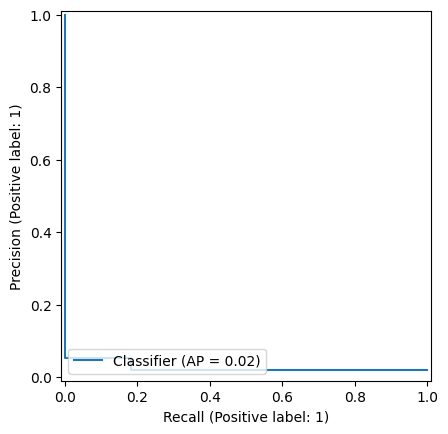

In [61]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.show()

### Modelos de clasificación

In [48]:
models = []
models.append(['XGBClassifier',XGBClassifier(random_state=0)])
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['SVC',SVC(random_state=0)])
models.append(['KNeigbors',KNeighborsClassifier()])
models.append(['GaussianNB',GaussianNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [49]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test_enc)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=3)

    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Balanced Accuracy Score: {:.2f} %\n',balanced_accuracy_score(y_test,y_pred))
    print('Accuracy Score: {:.2f} %\n',accuracy_score(y_test,y_pred))
    print('K-Fold Validation Mean Accuracy: {:.2f} %\n'.format(accuracies.mean()*100))
    print('Standard Deviation: {:.2f} %\n'.format(accuracies.std()*100))
    print('ROC AUC Score: {:.2f}\n'.format(roc))
    print('Precision: {:.2f}\n'.format(precision))
    print('Recall: {:.2f}\n'.format(recall))
    print('F1 Score: {:.2f}\n'.format(f1))
    print('-'*40)
    lst_2.append(models[m][0])
    lst_2.append(balanced_accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[5339  366]
 [  90   20]]
Balanced Accuracy Score: {:.2f} %
 0.5588319655804318
Accuracy Score: {:.2f} %
 0.9215821152192605
K-Fold Validation Mean Accuracy: 93.54 %

Standard Deviation: 0.71 %

ROC AUC Score: 0.56

Precision: 0.05

Recall: 0.18

F1 Score: 0.08

----------------------------------------
Logistic Regression :
[[4273 1432]
 [  33   77]]
Balanced Accuracy Score: {:.2f} %
 0.7244960560911481
Accuracy Score: {:.2f} %
 0.7480653482373173
K-Fold Validation Mean Accuracy: 78.31 %

Standard Deviation: 0.47 %

ROC AUC Score: 0.72

Precision: 0.05

Recall: 0.70

F1 Score: 0.10

----------------------------------------
SVC :
[[4561 1144]
 [  62   48]]
Balanced Accuracy Score: {:.2f} %
 0.6179188909250258
Accuracy Score: {:.2f} %
 0.7926053310404128
K-Fold Validation Mean Accuracy: 85.92 %

Standard Deviation: 0.51 %

ROC AUC Score: 0.62

Precision: 0.04

Recall: 0.44

F1 Score: 0.07

----------------------------------------
KNeigbors :
[[4830  875]
 [  70   40]]
Ba

In [55]:
df2 = pd.DataFrame(lst_1, columns=['Model','Balanced Accuracy','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by='ROC_AUC',inplace=True,ascending=False)
df2.to_csv(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'data', 'comparaciones.csv'), index=False)
df2

,Model,Balanced Accuracy,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
1,Logistic Regression,72.449606,74.806535,78.305374,0.467081,0.724496,0.051027,0.700000,0.095120
7,AdaBoostClassifier,71.883914,70.197764,78.084062,0.285007,0.718839,0.045378,0.736364,0.085488
2,SVC,61.791889,79.260533,85.917451,0.509521,0.617919,0.040268,0.436364,0.073733
3,KNeigbors,60.513107,83.748925,90.286610,0.356342,0.605131,0.043716,0.363636,0.078049
6,RandomForest,56.432954,91.487532,93.893252,0.281291,0.564330,0.051282,0.200000,0.081633
0,XGBClassifier,55.883197,92.158212,93.542680,0.711891,0.558832,0.051813,0.181818,0.080645
5,DecisionTree,54.590869,93.121238,93.612774,0.380825,0.545909,0.049689,0.145455,0.074074
4,GaussianNB,51.744084,5.313844,51.680615,0.058276,0.517441,0.019587,1.000000,0.038421


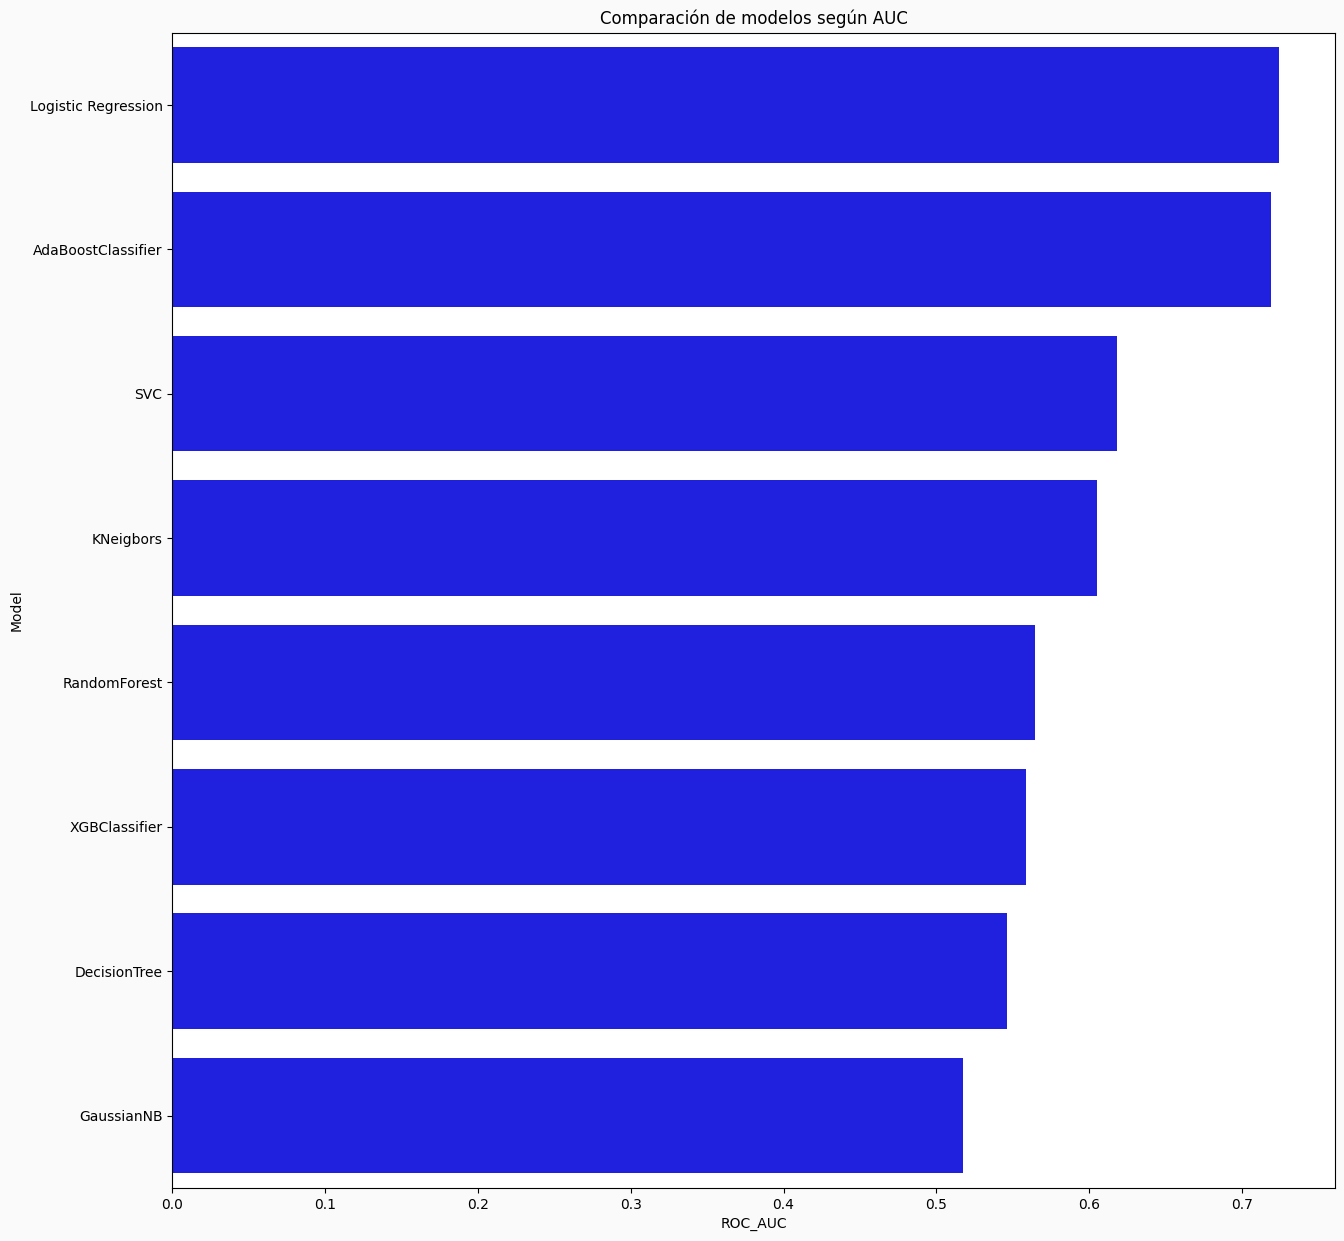

In [ ]:
fig = plt.figure(figsize=(15, 15), facecolor=background_color)
sns.barplot(x='ROC_AUC', y='Model', data=df2, color='b')
plt.title('Comparación de modelos según AUC');
# plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "comp.jpg"))

### Optuna

XGBClassifier

In [201]:
def objective(trial):

    params = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'eta' : trial.suggest_float('eta', 0, 1),
        'max_depth' : trial.suggest_int('max_depth', 1, 300),
        'alpha' : trial.suggest_float('leaf_size', 0, 0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 0.1),
    }
    model = XGBClassifier(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-08-05 17:50:47,586] A new study created in memory with name: no-name-f4e60f72-7024-4245-9508-198aeb9fc280


[I 2023-08-05 17:50:57,744] Trial 2 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.060130883314979955, 'max_depth': 54, 'leaf_size': 0.0861408276341194, 'reg_lambda': 0.0325083371042501}. Best is trial 2 with value: 0.5.
[I 2023-08-05 17:50:58,024] Trial 6 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.5743663780286148, 'max_depth': 112, 'leaf_size': 0.027297676845936515, 'reg_lambda': 0.08415370788102665}. Best is trial 2 with value: 0.5.
[I 2023-08-05 17:50:58,108] Trial 0 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.2894638785264677, 'max_depth': 105, 'leaf_size': 0.06405867891212245, 'reg_lambda': 0.03426503392961523}. Best is trial 2 with value: 0.5.
[I 2023-08-05 17:50:58,154] Trial 7 finished with value: 0.5 and parameters: {'booster': 'gblinear', 'eta': 0.11080640581338752, 'max_depth': 134, 'leaf_size': 0.0906280141778286, 'reg_lambda': 0.0734606293699038}. Best is trial 2 with value: 0.5.
[I 20

[I 2023-08-05 18:03:54,035] Trial 32 finished with value: 0.505161021799074 and parameters: {'booster': 'dart', 'eta': 0.8370621397707463, 'max_depth': 243, 'leaf_size': 0.01163496859310151, 'reg_lambda': 0.02007016745894977}. Best is trial 17 with value: 0.5116339100262933.


In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mXGBClassifier Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

XGBClassifier Model
Best parameters: {'booster': 'gbtree', 'eta': 0.9957423589060678, 'max_depth': 283, 'leaf_size': 0.0004010438482451653, 'reg_lambda': 0.03533431523250564}
Best ROC AUC score: 0.524
Precision score: 0.195
Recall score: 0.051
F1 score: 0.081


[23:57:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "leaf_size" } are not used.

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8385
           1       0.05      0.01      0.02       149

    accuracy                           0.98      8534
   macro avg       0.52      0.50      0.51      8534
weighted avg       0.97      0.98      0.97      8534

ROC AUC score: 0.7180079480376031
Balanced Accuracy Score:  0.5045050885850012


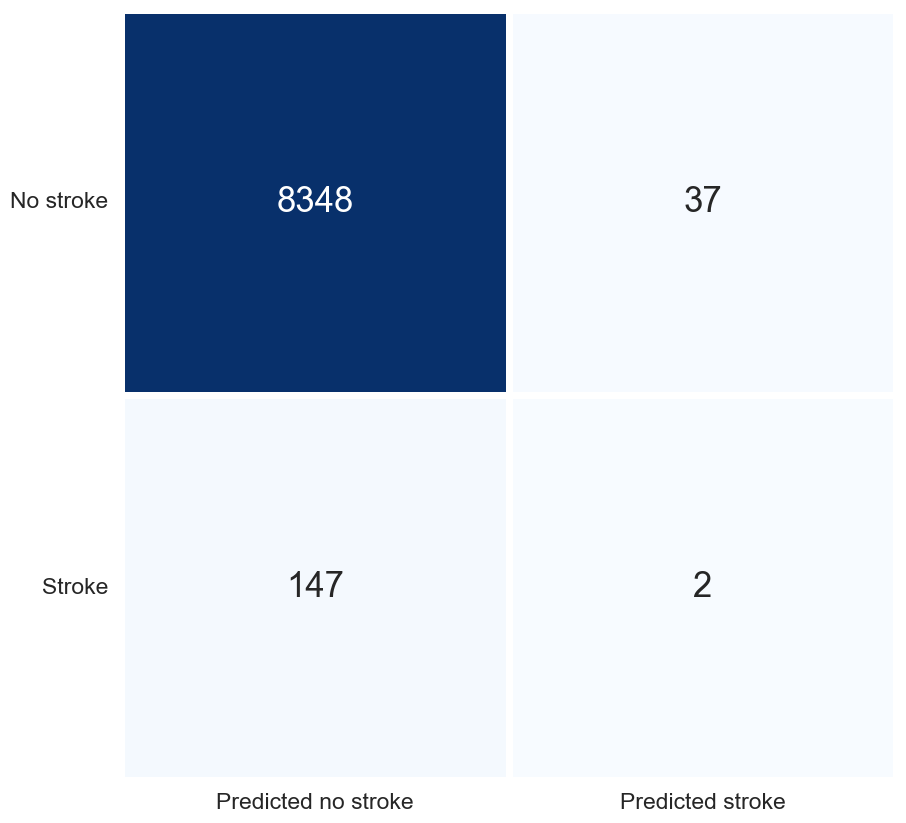

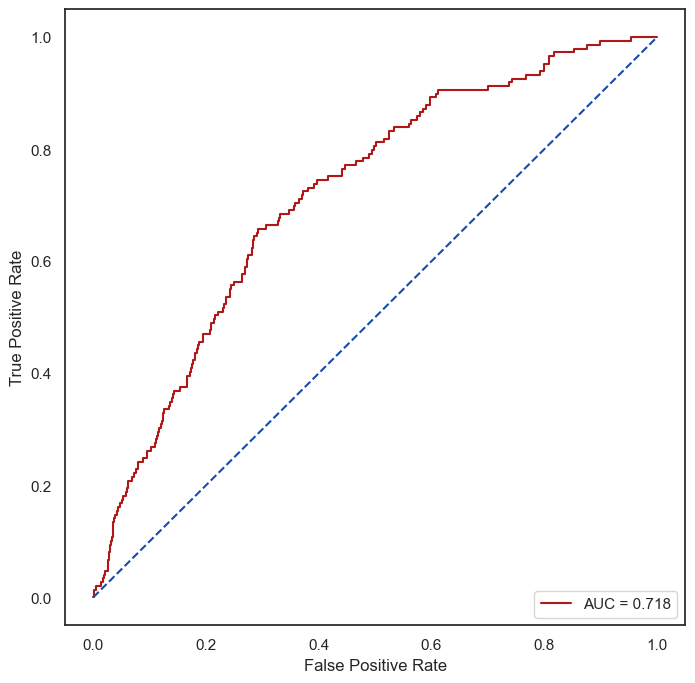

In [65]:
best_params = {'booster': 'gbtree', 'eta': 0.9957423589060678, 'max_depth': 283, 'leaf_size': 0.0004010438482451653, 'reg_lambda': 0.03533431523250564}
classifier = XGBClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_XGB.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_XGB.jpg"))

KNeighborsClassifier

In [ ]:
def objective(trial):

    params = {
            'n_neighbors' : trial.suggest_int('n_neighbors', 2, 7),
            'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
            'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size' : trial.suggest_int('leaf_size', 10, 50),
            'p' : trial.suggest_int('p', 1, 3),
    }
    model = KNeighborsClassifier(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-07-09 12:20:30,685] A new study created in memory with name: no-name-0b5bddff-a24d-46f0-be6b-de1c92af3a3e
[I 2023-07-09 12:20:35,340] Trial 0 finished with value: 0.5070315541834721 and parameters: {'n_neighbors': 3, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 48, 'p': 1}. Best is trial 0 with value: 0.5070315541834721.
[I 2023-07-09 12:20:39,062] Trial 6 finished with value: 0.5022460767455017 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 47, 'p': 2}. Best is trial 0 with value: 0.5070315541834721.
[I 2023-07-09 12:20:40,408] Trial 7 finished with value: 0.5020700823773214 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'algorithm': 'auto', 'leaf_size': 25, 'p': 1}. Best is trial 0 with value: 0.5070315541834721.
[I 2023-07-09 12:20:41,126] Trial 2 finished with value: 0.5061347675940188 and parameters: {'n_neighbors': 2, 'weights': 'uniform', 'algorithm': 'auto', 'leaf_size': 24, 'p': 1}. Best is trial 0 wi

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mKNeighborsClassifier Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

KNeighborsClassifier Model
Best parameters: {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1}
Best ROC AUC score: 0.512
Precision score: 0.045
Recall score: 0.038
F1 score: 0.042


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8385
           1       0.04      0.04      0.04       149

    accuracy                           0.97      8534
   macro avg       0.51      0.51      0.51      8534
weighted avg       0.97      0.97      0.97      8534

ROC AUC score: 0.5312518759529842
Balanced Accuracy Score:  0.5120245084502928


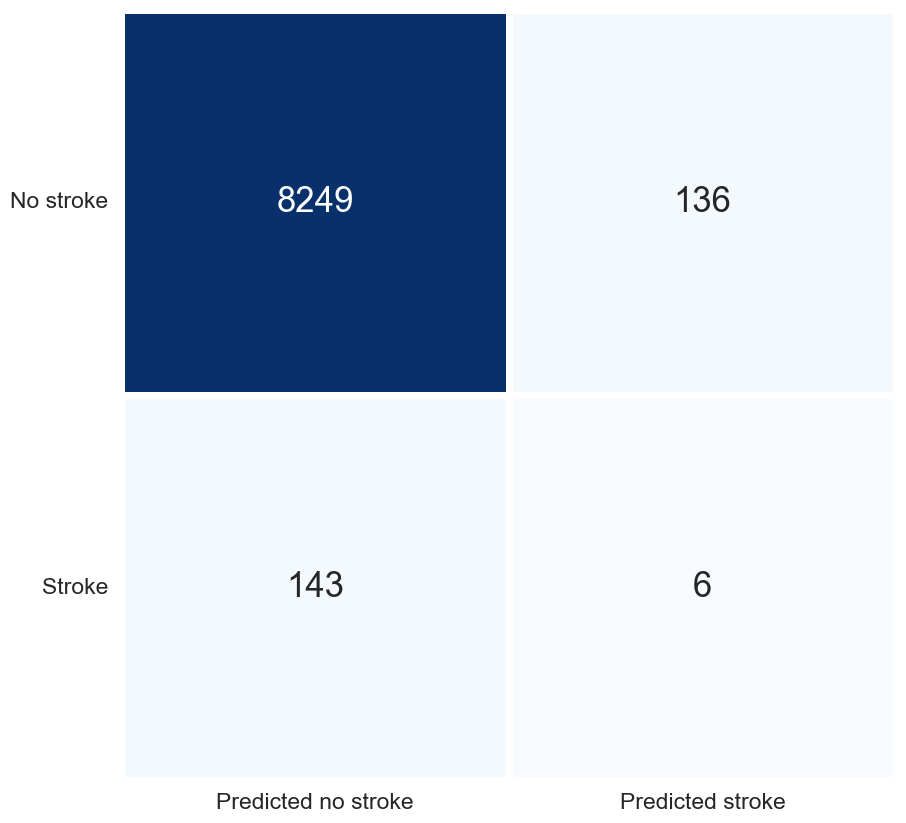

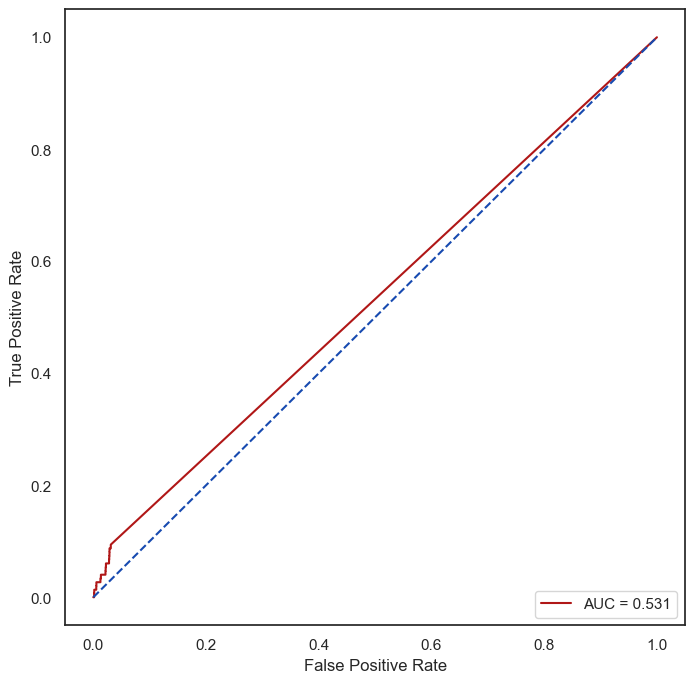

In [60]:
best_params = {'n_neighbors': 2, 'weights': 'distance', 'algorithm': 'brute', 'leaf_size': 30, 'p': 1}
classifier = KNeighborsClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_KNN.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_KNN.jpg"))

GaussianNB

In [ ]:
def objective(trial):

    params = {
                'var_smoothing' : 10**trial.suggest_float('var_smoothing', -11, -7)
    }    
    model = GaussianNB(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc


study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-07-09 12:36:55,252] A new study created in memory with name: no-name-e53a6d69-8bcf-4371-a676-c734b9012122
[I 2023-07-09 12:36:55,526] Trial 4 finished with value: 0.6901322087629502 and parameters: {'var_smoothing': -8.028242070106124}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,533] Trial 1 finished with value: 0.6794051465087725 and parameters: {'var_smoothing': -9.042636773711072}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,539] Trial 6 finished with value: 0.6634651385423183 and parameters: {'var_smoothing': -10.212881315464807}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,540] Trial 3 finished with value: 0.6652669322649616 and parameters: {'var_smoothing': -9.844522085712628}. Best is trial 4 with value: 0.6901322087629502.
[I 2023-07-09 12:36:55,563] Trial 2 finished with value: 0.6783491802996912 and parameters: {'var_smoothing': -9.115209257980032}. Best is trial 4 with value: 0.69013220

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mGaussianNB Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

GaussianNB Model
Best parameters: {'var_smoothing': -7.000577727631357}
Best ROC AUC score: 0.714
Precision score: 0.033
Recall score: 0.943
F1 score: 0.063


              precision    recall  f1-score   support

           0       1.00      0.48      0.65      8385
           1       0.03      0.91      0.06       149

    accuracy                           0.48      8534
   macro avg       0.51      0.69      0.35      8534
weighted avg       0.98      0.48      0.64      8534

ROC AUC score: 0.7889936087532466
Balanced Accuracy Score:  0.6916009332741033


Text(0.5, 0, 'False Positive Rate')

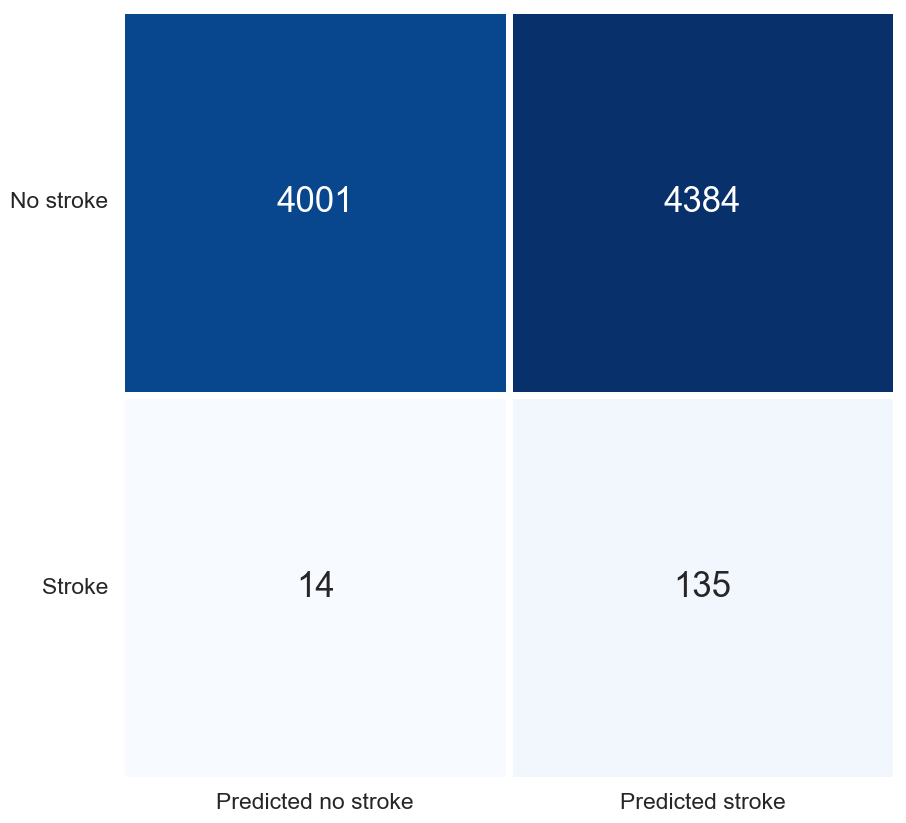

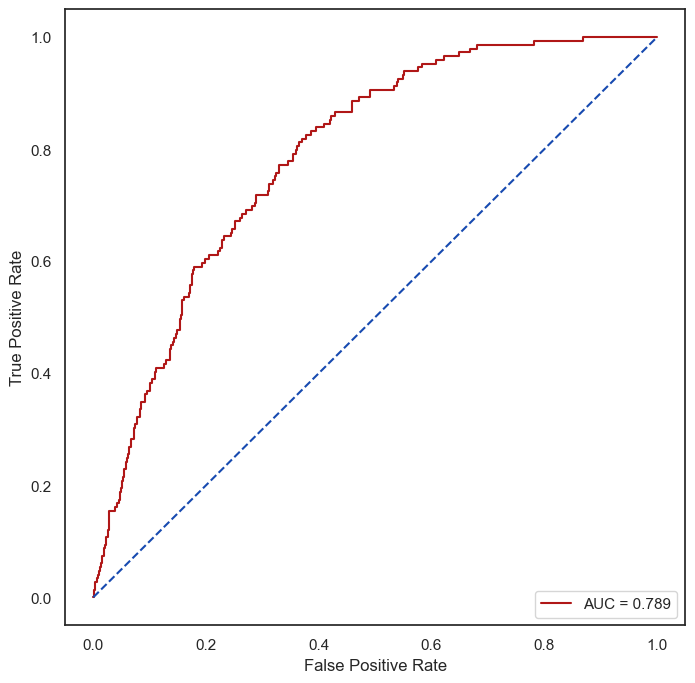

In [100]:
classifier = GaussianNB(var_smoothing=10**(-7.000577727631357))
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
# plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_GNB.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_GNB.jpg"))

DecisionTreeClassifier

In [ ]:
def objective(trial):

    params = {
            'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
            'max_depth' : trial.suggest_int('max_depth', 2, 50),
            'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 5, 100),
            'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    model = DecisionTreeClassifier(**params)
    
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=500)

[I 2023-07-30 22:29:53,946] A new study created in memory with name: no-name-0152fb7c-0ae6-4d8d-93e2-43ac208cd059
[I 2023-07-30 22:29:54,604] Trial 3 finished with value: 0.5 and parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 51, 'max_features': 'auto'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,816] Trial 2 finished with value: 0.5 and parameters: {'criterion': 'entropy', 'max_depth': 39, 'min_samples_leaf': 46, 'max_features': 'log2'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,865] Trial 0 finished with value: 0.5 and parameters: {'criterion': 'log_loss', 'max_depth': 11, 'min_samples_leaf': 74, 'max_features': 'log2'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,916] Trial 6 finished with value: 0.5 and parameters: {'criterion': 'gini', 'max_depth': 25, 'min_samples_leaf': 89, 'max_features': 'auto'}. Best is trial 3 with value: 0.5.
[I 2023-07-30 22:29:54,966] Trial 7 finished with value: 0.5 and parameters: {'criterion

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'\033[1mDecisionTreeClassifier Model\033[0m\nBest parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

DecisionTreeClassifier Model
Best parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 51, 'max_features': 'auto'}
Best ROC AUC score: 0.5
Precision score: 0.0
Recall score: 0.0
F1 score: 0.0


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8385
           1       0.00      0.00      0.00       149

    accuracy                           0.98      8534
   macro avg       0.49      0.50      0.50      8534
weighted avg       0.97      0.98      0.97      8534

ROC AUC score: 0.7137393796048392
Balanced Accuracy Score:  0.5


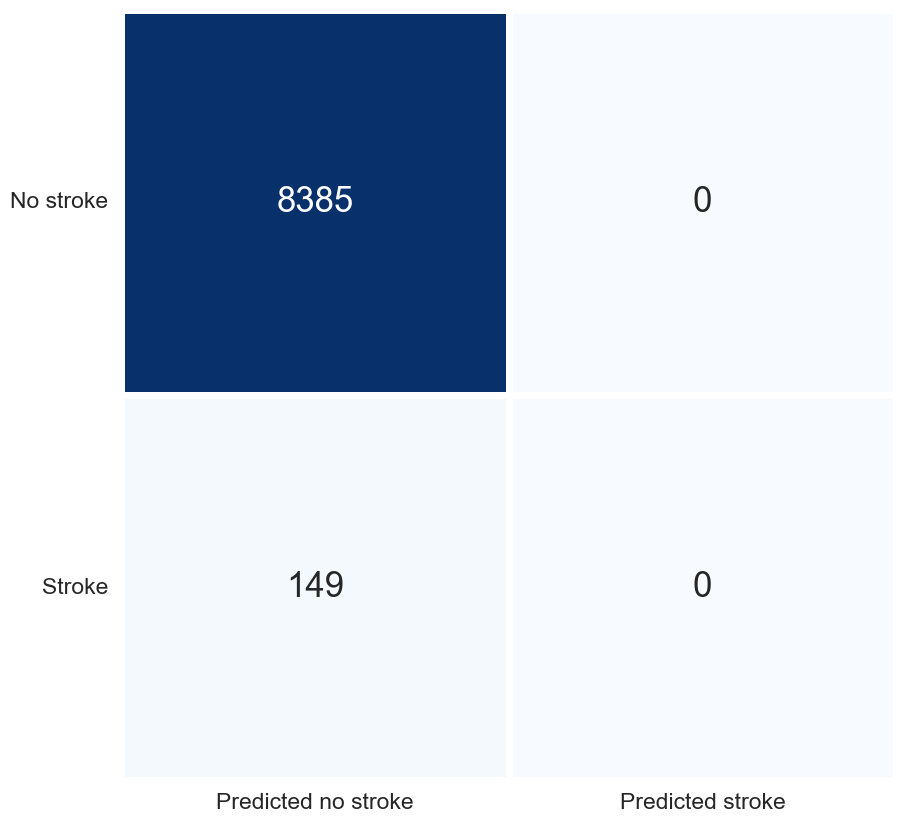

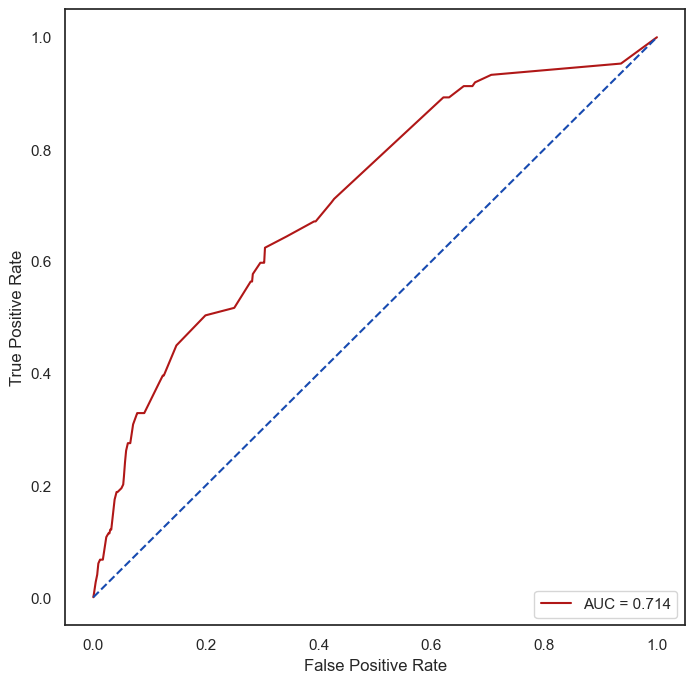

In [62]:
best_params = {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 51, 'max_features': 'auto'}
classifier = DecisionTreeClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Balanced Accuracy Score: ',balanced_accuracy_score(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize = (10, 10))
sns.set(font_scale=1.5)
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 25}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'utils', "image", "mat_DTC.jpg"))

# Curva ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig(os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))), 'utils', "image", "roc_DTC.jpg"))

Modelos agrupados

In [ ]:
def objective(trial):

    classifier_name = trial.suggest_categorical("model", ['KNeigbors', 'GaussianNB', 'DecisionTree', 'XGBoost'])
   
    if classifier_name == 'KNeigbors':
        params = {
                'n_neighbors' : trial.suggest_int('n_neighbors', 2, 7),
                'weights' : trial.suggest_categorical('weights', ['uniform', 'distance']),
                'algorithm' : trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                'leaf_size' : trial.suggest_int('leaf_size', 10, 50),
                'p' : trial.suggest_int('p', 1, 3),
        }
        model = KNeighborsClassifier(**params)
   
    elif classifier_name == 'GaussianNB':
        params = {
                'var_smoothing' : 10**trial.suggest_float('var_smoothing', -11, -7)
        }
        model = GaussianNB(**params)
   
    elif classifier_name == 'DecisionTree':
        params = {
                'criterion' : trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']),
                'max_depth' : trial.suggest_int('max_depth', 2, 50),
                'min_samples_leaf' : trial.suggest_int('min_samples_leaf', 5, 100),
                'max_features' : trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        }
        model = DecisionTreeClassifier(**params)
    
    else:
        params = {
        'booster' : trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'eta' : trial.suggest_float('eta', 0, 1),
        'max_depth' : trial.suggest_int('max_depth', 1, 300),
        'alpha' : trial.suggest_float('leaf_size', 0, 0.1),
        'reg_lambda' : trial.suggest_float('reg_lambda', 0, 0.1),
        }
        model = XGBClassifier(**params)
        
   
   
    model.fit(X_train, y_train)

    y_pred = np.round(model.predict(X_test))

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    roc = roc_auc_score(y_test,y_pred)

    trial.set_user_attr('precision', precision)
    trial.set_user_attr('recall', recall)
    trial.set_user_attr('f1', f1)
   
    return roc

study = optuna.create_study(sampler=optuna.samplers.TPESampler(), direction='maximize')
study.optimize(objective, n_jobs=-1, n_trials=2000)

In [ ]:
parameters = study.best_params
roc = round(study.best_value, 3)
precision = round(study.best_trial.user_attrs['precision'], 3)
recall = round(study.best_trial.user_attrs['recall'], 3)
f1 = round(study.best_trial.user_attrs['f1'], 3)

print(f'Best parameters: {parameters}\nBest ROC AUC score: {roc}\nPrecision score: {precision}\nRecall score: {recall}\nF1 score: {f1}')

### Guardamos modelo escogido

In [23]:
best_model = GaussianNB(var_smoothing=10**(-7.000577727631357))
best_model.fit(X, y)

GaussianNB(var_smoothing=9.986706173812031e-08)

In [24]:
name = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('file'))),'model', 'modelo')
with open(name, 'wb') as file:  
    pickle.dump(best_model, file)

In [25]:
with open(name, 'rb') as file:  
    model = pickle.load(file)

In [26]:
y_pred = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
auc

0.703456956133716